In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bd = pd.read_csv("bird_dino_data.csv")

In [4]:
bd["Total Brain Mass"] = bd["Olfactory bulbs (cm3)"] + bd["Cerebrum (cm3)"] + bd["Optic Lobes (cm3)"] + bd["Cerebellum (cm3)"] + bd["Brain Stem (cm3)"]

In [5]:
Olfactorywidth = 0.05
Cerebrumwidth = 0.275
Opticwidth = 0.25
Cerebellumwidth = 0.225

Brainvolume = 1.4

In [16]:
bd.head()

# cm^3 = g

,Species ID,Bird vs Dino,Body Mass (kg),Olfactory bulbs (cm3),Cerebrum (cm3),Optic Lobes (cm3),Cerebellum (cm3),Brain Stem (cm3),Total Brain Mass,Cerebrum to Whole,Brain to Body Mass
0,1,B,0.02,0.009,1.53,0.20,0.16,0.06,1.959,0.781011,0.097950
1,2,B,1.26,0.006,16.81,2.84,1.70,0.68,22.036,0.762843,0.017489
2,3,B,2.18,0.026,11.08,1.95,0.89,1.15,15.096,0.733969,0.006925
3,4,D,0.25,0.050,0.41,0.16,0.09,0.12,0.830,0.493976,0.003320
4,5,B,0.01,0.003,1.57,0.20,0.34,0.08,2.193,0.715914,0.219300


In [6]:
bd["Cerebrum to Whole"] = bd["Cerebrum (cm3)"] / bd["Total Brain Mass"]

In [7]:
bd["Brain to Body Mass"] = bd["Total Brain Mass"]/(bd["Body Mass (kg)"]*1000)

In [8]:
CWB = bd["Cerebrum to Whole"].loc[bd["Bird vs Dino"] == "B"]
avgCWB = CWB.mean()

In [9]:
CWD = bd["Cerebrum to Whole"].loc[bd["Bird vs Dino"] == "D"]
avgCWD = CWD.mean()

In [10]:
BBB = bd["Brain to Body Mass"].loc[bd["Bird vs Dino"] == "B"]
avgBBB = BBB.mean()
print(avgBBB)

0.04781897158703077


In [11]:
#dinosaur
BBD = bd["Brain to Body Mass"].loc[bd["Bird vs Dino"] == "D"]
avgBBD = BBD.mean()

In [12]:
def dinosaur(dtype, femur):
    if (dtype == "ornithischian"):
        mass = 10**(3.0587*np.log10(femur)-2.7042)/1000
    elif (dtype == "sauropod"):
        mass = 10**(2.3459*np.log10(femur)-0.2935)/1000
    elif (dtype == "theropod"):
        mass = 10**(3.1854*np.log10(femur)-3.184)/1000
    return mass

In [17]:
def info(femur,vol,cerebrum,olfact,optic,cerebellum):
    bm_kg = dinosaur("theropod",femur)
    your_BB = vol/bm_kg*1000
    total = olfact + cerebrum + optic + cerebellum
    cerebrumWhole = cerebrum/total 
    brainCW = olfact + cerebrum + optic + cerebellum
    if abs(your_BB - avgBBB)>abs(your_BB - avgBBD):
        bm_ans =  "Dino"
    elif abs(your_BB - avgBBB)<abs(your_BB - avgBBD):
        bm_ans =  "Bird"
            
    if abs(brainCW - avgCWD)>abs(brainCW - avgCWB):
        cw_ans =  "Dino"
    elif abs(brainCW - avgCWD)<abs(brainCW - avgCWB):
        cw_ans =  "Bird"
    return [bm_ans,cw_ans]


In [18]:
print(info(7,1.4,0.275,0.05,0.25,0.225))

['Bird', 'Dino']


In [30]:
bodymass = bd["Body Mass (kg)"]
brainmass = bd["Total Brain Mass"]
color = bodymass - brainmass
bd["color"] = color

ValueError: x and y must be the same size

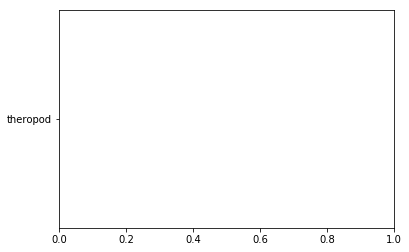

In [34]:
plt.scatter(bd["color"], "theropod")
plt.xlabel('Body Mass (kg)')
plt.ylabel('Brain Mass (cm3)')
plt.title('Brain vs Body mass of Birds and Dinosaurs')

z = table_new["J"].loc[table_new["J"] == 3.64]
z.head()
plt.plot(SunJ, SunG, marker = "*", markersize = 20)